# Exploring reddit data using Spark

This notebook provides startup code for downloading Reddit data from the Azure Blob Storage bucket specifically setup for this project.   
_<b>Make sure you are running this notebook on a cluster which has the credentials setup to access Azure Blob Storage, otherwise this notebook will not be able to read the data!</b>_

_<b>Make sure you are using DataBricks Runtime 11.3 or newer otherwise you will not be able to save any new files in this repository!</b>_

The dataset for this notebook is described in [The Pushshift Reddit Dataset](https://arxiv.org/pdf/2001.08435.pdf) paper.

# Instruction
YouTube and Twitch: The online video heavyweight battle of the century.

While there are many similarities between Twitch and YouTube - for example, they are both audio/video sharing platforms - there are also many differences between the two platforms.

The most significant difference between Twitch and YouTube is the viewer's interest. Twitch caters to live-stream hosts and is the largest live-streaming platform in the world. On the other hand, YouTube uses an excellent search engine to help those interested in a specific topic find videos that match their heart's expectations.

While the two video sites have different focuses, they also have similar modules. YouTube, for example, has a live streaming system, while Twitch is also drawing on more different categories of video submissions.

This study examines the difference in users' focus using these two video platforms by comparing two different subreddit statements on Reddit, 'youtube' and 'Twitch'.

## Propose 10 different avenues of analysis for your data.

### 1. What is the total performance of users’ comments on Twitch and Youtube in recent 2 years?
##### Business Goal: 
Python and Spark would be the primary programming languages used to compare the total comments analysis between Twitch and Youtube users. By doing this, readers can therefore get an overview of the total users activities between these two social media platforms from 2021/01/01 to 2022/08/31. 
##### Technical Proposal：
Technically, packages of seaborn and matplotlib would be adapted to vividly show visualizations. The new datasets of ‘submissions_twitch’, ‘submissions_youtube’ are generated based on 15 variables such as ‘author_id’, ‘title’, and so on. Two bar plots would therefore be generated with the columns of ‘num_comments’ in these two new datasets. 

### 2. What’s the Time series patterns of comments number. Based on Q1 
##### Business Goal: 
To define time series patterns for Twitch comments and Youtube comments. 
##### Technical Proposal: 
Use “plotly” to do line plots based on date and ‘num_comments’, and combine the Twitch plots with Youtube plots. Find whether there are the same patterns between Twitch comments and Youtube comments. Then analyze the user activity behavior. And try to track the influence of those big news (some may match with the summits in plots) 


### 3. What’s the relationship between length of comments and “score”(upvote-downvote)?
##### Business Goal: 
Determine if long comments could represent high quality comments somehow. 
##### Technical Proposal: 
Create a new column called “body_length”, which saves numeric data representing the length of comments. Create a scatter plot that compares the body_length and score. (Here we define that a high quality comment doesn't  have to be right or receive a positive score, instead as long as it could activate people to give responses and even write down sub-comments. Thus a very low negative score also can be considered a high quality comments. )

### 4. What’s the ratio of having outer links in Youtube and Twitch? Are comments with an outer link are more likely to have a higher score?
##### Business Goal: 
Determine whether having outer links means giving higher quality comments. And analyze the outer links ratio in these two platforms.
##### Technical Proposal: 
Choose “is_self” as a new feature. Generate two pie charts for the ratio of having outer links in Youtube and Twitch, and then compare and analyze the result. Build another viz that contains the information of “is_self” and “score”, find whether these two features have any correlation to each other.

### 5. What’s the hottest topics in Youtube and Twitch Reddits?
##### Business goal: 
To define the most popular topics for Youtube and Twitch lovers. Dive deeper into user hobbies in social media.
##### Technical Proposal: 
Select the “body” column in “comments_youtube” and “comments_twitch” table, use “Wordcloud”, “matplotlib”, “pandas'' to generate word clouds and word frequency lists for Youtube and Twitch comments. Implement key words analysis. Compare their word clouds viz and frequency lists, and find their differences and similarities.

### 6. What are the top 10 qualified topics that users agree most for both Youtube and Twitch? Based on Q5. 
##### Business Goal: 
The goal is to discover the topic for youtube and twitch which receive the top 10 of reviewing scores correspondingly. This would reflect the users’ acceptance level for each topic. Python and Spark would be the primary programming languages used for this business goal. 
##### Technical Proposal: 
The column of ‘score’ from the submissions_youtube and submissions_twitch would be used. Since the score column is created by subtracting the downvotes from upvotes, the scores would be balanced to 0 if the topic is too controversial or not influential at all. The quantitative analysis would be conducted to filter topics with the top 10 highest reviewing scores. 

### 7. What are the similarities and differences of the topic that is detected over 18 or below 18 on twitch and youtube? Based on Q5.
##### Business Goal: 
The goal is to discover the insights of the functions of platforms that users care about based on whether the comment is over 18 or not. The programming languages would be Spark and Python. 
##### Technical Proposal: 
Based on the business goal of getting the most popular topic based on users’ ages. The NLP tool of Text Classification analysis can be conducted. For plotting, the table of ‘submissions_twitch’ and ‘‘submissions_youtube’ and column of ‘over_18’ would be used; the machine learning methods of decision trees might also 
used to classify the content that a specific topic has the most. 

### 8. How to help the company predict the future over-18 comments and posts? Based on Q7.
##### Business Goal: 
The goal is to improve the overall quality of the subreddit platform, and therefore, improve the efficiency for administrators when dealing with posts. The programming languages used would be Python and Spark. 
##### Technical Proposal: 
The table of ‘submissions_twitch’ and ‘submissions_youtube’ would be used. And the columns of ‘title’, ‘selftext’, and ‘over_18’ can be used. Since titles are all text data, the method of vectorization should be applied first. Then, the training and testing dataset would be splitted for doing the predictive models. For prediction, the NLP model of text prediction can be used to help the administrator automatically determine if the text is over-18 and needs to be deleted. 

### 9. Sentiments analysis for Youtube and Twitch Reddits? Based on Q5.
##### Business Goal: 
Analyze redditers’ sentiments score and make comparison between these two video based platforms.
##### Technical Proposal: 
Apply “nltk” package in the “body” column to perform data tokenization, lementization, stopword removal. Pretrained models will be used to inference text sentiment. Comparisons based on sentiment and interactive features including scores and number of comments will be drawn.

### 10. Provide a list of technical problems, what is the frequency that users have on these technical problems of each platform? / Any suggestions for twitch and youtube to improve based on users’ post? 
##### Business Goal: 
The goal of this business question is to help twitch and youtube discover the most frequent problems that users meet, and help them to improve the user experience. The programming language used for this question would be Python and Spark. 
##### Technical Proposal: 
In order to filter the topics, a list of technical problems such as ‘appcrash’ and ‘server collapse’ needs to be collected first. TFIDF would be used to deal with the text data.  After cleaning the dataset, the NLP method of Keyword Extraction can be conducted to extract the topic word and fit the problems to posts.

## Read the data
Let us begin with listing the file in the bucket. There are two folders `comments` and `submissions`, we will read both of them into separate Spark dataframes. The raw data is in [parquet format](https://www.databricks.com/glossary/what-is-parquet#:~:text=What%20is%20Parquet%3F,handle%20complex%20data%20in%20bulk.).

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet") 

Out[1]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/', name='comments/', size=0, modificationTime=1666557328000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions/', name='submissions/', size=0, modificationTime=1666559745000)]

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
#submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

The `count` operation below will take several minutes, it is show here because it provides an oppurtunity to look at the Spark UI will a computation is in progress. Expand the `Spark Jobs` output in the result cell to see how the job is progressing and then drill down into task details.

In [0]:
# comments_row_count = comments.count()
# comment_col_count = len(comments.columns)

In [0]:
# print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

A glimpse of the data and the schema.

In [0]:
# comments.show()

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

In [0]:
# comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



## Exploratory Data Analysis

Here is an example of some EDA. But, before we do that let us setup some local directory structure so that that the results can be checked in into the repo.

In [0]:
## create a directory called data/plots and data/csv to save generated data
import os
# PLOT_DIR = os.path.join("data", "plots")
# CSV_DIR = os.path.join("data", "csv")
# os.makedirs(PLOT_DIR, exist_ok=True)
# os.makedirs(CSV_DIR, exist_ok=True)

### How many subreddits are there and which are the more popular ones?

One of the first questions we can ask is how many subreddits are there and which ones are the top 10 based on the number of submissions.

In [0]:
# from pyspark.sql.functions import col, asc,desc
# submissions_by_subreddit = submissions.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()

In [0]:
# len(submissions_by_subreddit)

In [0]:
# submissions_youtube = submissions.filter(submissions.subreddit == "youtube")

In [0]:
# submissions_twitch = submissions.filter(submissions.subreddit == "Twitch")

In [0]:
# submissions_youtube.select('author').show(5)

+-----------+
|     author|
+-----------+
|funshare-in|
|   MMoyanoM|
|  [deleted]|
|jayseventwo|
|  [deleted]|
+-----------+
only showing top 5 rows



In [0]:
# submissions_youtube.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
comments_youtube = comments.filter(comments.subreddit == "youtube")

In [0]:
comments_twitch = comments.filter(comments.subreddit == "Twitch")

In [0]:
# submissions_twitch.columns

Out[73]: ['adserver_click_url',
 'adserver_imp_pixel',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_css_class',
 'author_flair_text',
 'author_id',
 'brand_safe',
 'contest_mode',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'disable_comments',
 'distinguished',
 'domain',
 'domain_override',
 'edited',
 'embed_type',
 'embed_url',
 'gilded',
 'hidden',
 'hide_score',
 'href_url',
 'id',
 'imp_pixel',
 'is_crosspostable',
 'is_reddit_media_domain',
 'is_self',
 'is_video',
 'link_flair_css_class',
 'link_flair_text',
 'locked',
 'media',
 'media_embed',
 'mobile_ad_url',
 'num_comments',
 'num_crossposts',
 'original_link',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'post_hint',
 'preview',
 'promoted',
 'promoted_by',
 'promoted_display_name',
 'promoted_url',
 'retrieved_on',
 'score',
 'secure_media',
 'secure_media_embed',
 'selftext',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'suggested_sort',
 'third_party_trac

In [0]:
# submissions_twitch.count() 

In [0]:
# this code saves the data as a csv just for illustration, use parquet for faster analytics operations.
# save to DBFS without size limitation.
# submissions_youtube.select("id", "author_id", "title", "selftext", "num_comments", "over_18", "score").write.format('com.databricks.spark.csv').save("/FileStore/data/sub_youtube")

In [0]:
# dbutils.fs.rm("/Workspace/Repos/ql150@georgetown.edu/fall-2022-project-eda-adb-project-group-26/data/csv/subreddits_count_by_submission.csv", True)

Out[7]: True

In [0]:
# submissions = submissions_youtube.union(submissions_twitch)

## Saving data to DBFS
Sometimes we may want to save intermediate data, especially if it is big and took a significant time to generate, in DBFS. The following code shows an example of this. We save submissions on the `youtube` and `twitch` subreddit into dbfs so that we can read from it at a later stage.

In [0]:
# submissions.select("id", "author_id", "subreddit", "title", "selftext", "num_crossposts", "num_comments", "is_self", "is_video", "is_crosspostable", "over_18", "promoted", "stickied", "score", "created_utc").write.parquet("/FileStore/data/submissions_all.parquet") 

In [0]:
# submissions_youtube.select("id", "author_id", "subreddit", "title", "selftext", "num_crossposts", "num_comments", "is_self", "is_video", "is_crosspostable", "over_18", "promoted", "stickied", "score", "created_utc").write.parquet("/FileStore/data/submissions_youtube.parquet") 

In [0]:
# submissions_twitch.select("id", "author_id", "subreddit", "title", "selftext", "num_crossposts", "num_comments", "is_self", "is_video", "is_crosspostable", "over_18", "promoted", "stickied", "score", "created_utc").write.parquet("/FileStore/data/submissions_twitch.parquet") 

In [0]:
 comments_youtube.select("id", "link_id", "author", "body", "score", "created_utc", "subreddit").write.parquet("/FileStore/data/comments_youtube.parquet") 

In [0]:
 comments_twitch.select("id", "link_id", "author", "body", "score", "created_utc", "subreddit").write.parquet("/FileStore/data/comments_twitch.parquet") 

In [0]:
comments = comments_youtube.union(comments_twitch)

In [0]:
# submissions_youtube = spark.read.csv("/FileStore/data/sub_youtube")
# submissions_youtube.show()

In [0]:
comments.select("id", "link_id", "author", "body", "score", "created_utc", "subreddit").write.parquet("/FileStore/data/comments_all.parquet") 

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
<command-3064073610556438> in <cell line: 1>()
----> 1 comments.select("id", "link_id", "author", "body", "score", "created_utc", "subreddit").write.parquet("/FileStore/data/comments_all.parquet")

/databricks/spark/python/pyspark/instrumentation_utils.py in wrapper(*args, **kwargs)
     46             start = time.perf_counter()
     47             try:
---> 48                 res = func(*args, **kwargs)
     49                 logger.log_success(
     50                     module_name, class_name, function_name, time.perf_counter() - start, signature

/databricks/spark/python/pyspark/sql/readwriter.py in parquet(self, path, mode, partitionBy, compression)
   1138             self.partitionBy(partitionBy)
   1139         self._set_opts(compression=compression)
-> 1140         self._jwrite.parquet(path)
   1141 
   1142     def text(



## Read Data From DBFS

In [0]:
submissions_youtube=spark.read.parquet("/FileStore/data/submissions_youtube.parquet")
submissions_twitch=spark.read.parquet("/FileStore/data/submissions_twitch.parquet")

In [0]:
submissions = submissions_youtube.union(submissions_twitch)

In [0]:
comments_youtube=spark.read.parquet("/FileStore/data/comments_youtube.parquet")
comments_twitch=spark.read.parquet("/FileStore/data/comments_twitch.parquet")

In [0]:
comments = comments_youtube.union(comments_twitch)

In [0]:
type(submissions_youtube)

Out[5]: pyspark.sql.dataframe.DataFrame

In [0]:
display(submissions_youtube)

id,author_id,subreddit,title,selftext,num_crossposts,num_comments,is_self,is_video,is_crosspostable,over_18,promoted,stickied,score,created_utc
ok0w0a,null,youtube,Green Screen Subscribe And Bell Icon Intro | Subscribe Animation Green Screen Free Download 2021,,0,1,false,false,false,false,null,false,1,07/14/2021 09:38:14
ok0w83,null,youtube,What The Hell Is This Advertisement?,,0,3,false,false,false,false,null,false,0,07/14/2021 09:38:44
ok111s,null,youtube,Publishing beach video on my YT channel?,[removed],0,1,true,false,false,false,null,false,1,07/14/2021 09:49:41
ok138n,null,youtube,"Please can someone explain to me, why is a song from 1971 part of youtube kids and treated as such with the comments and miniplayer turned off?",,0,4,false,false,true,false,null,false,14,07/14/2021 09:54:27
ok16vv,null,youtube,I am a New fortnite montage channel https://youtube.com/channel/UCrLKuSx6bqz7Ys-5P8I20WA,[removed],0,1,true,false,false,false,null,false,1,07/14/2021 10:01:33
ok17t2,null,youtube,Stick Fight:2,[deleted],0,1,false,false,false,false,null,false,1,07/14/2021 10:03:30
ok17za,null,youtube,I am a New fortnite montage channel upload every week,,0,1,false,false,false,false,null,false,1,07/14/2021 10:03:49
ok19vx,null,youtube,Follow me for latest,,0,1,false,false,false,false,null,false,1,07/14/2021 10:07:40
ok1bin,null,youtube,YouTube Premium Lite,"Looks like YouTube Premium Lite silently launched for 6,99/mo in Finland and Sweden at least, haven't found any info on it anywhere, but it is just YouTube without the ads for half the price of YouTube Premium! Which is very nice. https://preview.redd.it/qkcyv3jak5b71.png?width=1490&format=png&auto=webp&s=2a1cedd985e61549ccc07538596d7bc665458e07",0,53,true,false,true,false,null,false,22,07/14/2021 10:10:58
ok1bk6,null,youtube,Small Edit YouTuber,[removed],0,1,true,false,false,false,null,false,1,07/14/2021 10:11:03


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
import pyspark.sql.functions as f
submissions_youtube = submissions_youtube.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy HH:mm:ss"))
submissions_twitch = submissions_twitch.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy HH:mm:ss"))
submissions = submissions.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy HH:mm:ss"))

In [0]:
import pyspark.sql.functions as f
df_t = submissions.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy HH"))

In [0]:
number_sub_byhour = df_t.groupby("created_utc", "subreddit").count().toPandas()

In [0]:
number_sub_byhour["created_utc"] = pd.to_datetime(number_sub_byhour["created_utc"])

In [0]:
number_sub_byhour.head()

,created_utc,subreddit,count
0,2021-04-24 07:00:00,youtube,8
1,2021-10-11 06:00:00,youtube,8
2,2021-08-26 10:00:00,youtube,10
3,2021-05-28 18:00:00,youtube,15
4,2021-04-06 06:00:00,youtube,10


In [0]:
len(pd.unique(number_sub_byhour["created_utc"]))

Out[15]: 14570

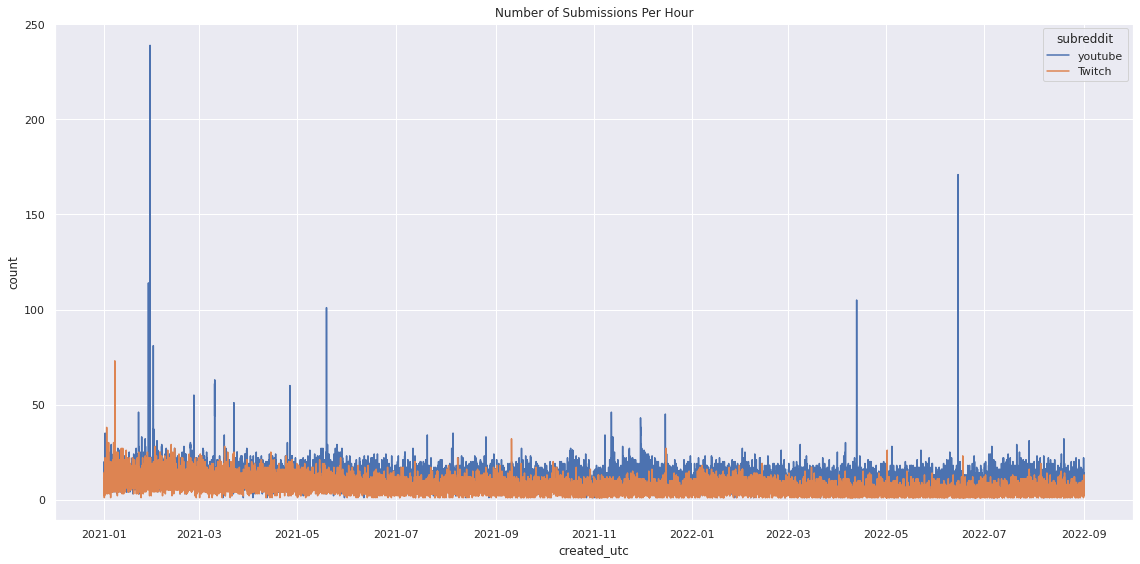

In [0]:
plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax = sns.lineplot(x='created_utc',
                  y='count',
                  hue='subreddit',
                  data=number_sub_byhour).set(title='Number of Submissions Per Hour')
plt.tight_layout()
plt.show()

In [0]:
number_sub_byhour.to_csv("/dbfs/FileStore/data/number_sub_byhour.csv", index=False)

In [0]:
submissions_youtube.show()

+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+
|    id|author_id|subreddit|               title|            selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|
+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+
|ok0w0a|     null|  youtube|Green Screen Subs...|                    |             0|           1|  false|   false|           false|  false|    null|   false|    1| 07/14/2021|
|ok0w83|     null|  youtube|What The Hell Is ...|                    |             0|           3|  false|   false|           false|  false|    null|   false|    0| 07/14/2021|
|ok111s|     null|  youtube|Publishing beach ...|           [removed]|             0|           1|   true|   false|

In [0]:
comments = comments.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy"))

In [0]:
comments.show()

+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|            author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|        FieldOfFox|          null|                  null|                null|  Music taste is bad|    true|               

#EDA

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA1: Number of Submissions in these two subreddit(bar chart)

In [0]:
number_sub = submissions.groupby('subreddit').count()
number_sub.show()

+---------+------+
|subreddit| count|
+---------+------+
|  youtube|163584|
|   Twitch| 97243|
+---------+------+



In [0]:
df_numbersub = number_sub.cache().toPandas()
df_numbersub

,subreddit,count
0,youtube,163584
1,Twitch,97243


There are 163,584 youtube and 97,243 Twitch submissions. The bar plot clearly shows the difference between the popularity of submissions in these two subreddits.

<Figure size 720x576 with 0 Axes>

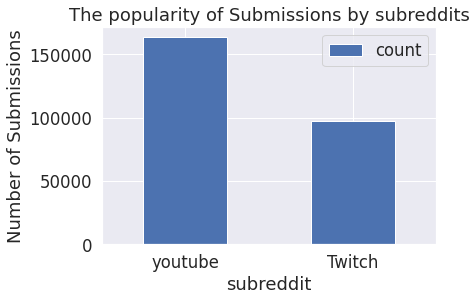

In [0]:
plt.figure(figsize=(10, 8))
df_numbersub.plot.bar(x='subreddit', y='count') 
plt.title("The popularity of Submissions by subreddits")
plt.ylabel("Number of Submissions") 
sns.set(font_scale=1.5)
plt.xticks(rotation=0)
# plt.tight_layout()
plt.show()

In [0]:
df_numbercom = comments.groupby('subreddit').count().cache().toPandas()
df_numbercom

,subreddit,count
0,youtube,443028
1,Twitch,580095


<Figure size 720x576 with 0 Axes>

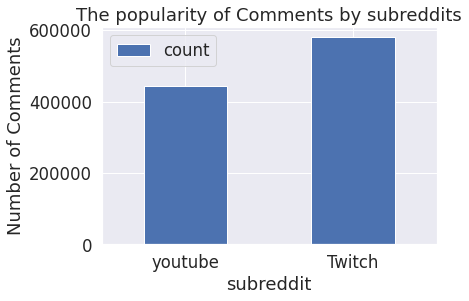

In [0]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
df_numbercom.plot.bar(x='subreddit', y='count') 
plt.title("The popularity of Comments by subreddits")
plt.xticks(rotation=0)
plt.ylabel("Number of Comments") 
plt.show()

The bar plot shows the polulation of submissions in these two different subreddit. It is obvious that youtube had more submission then Twitch from January 1, 2021 to Auguest 21, 2022.

## EDA2: Trend of Submission Activities

In [0]:
number_sub_byday = submissions.groupby("created_utc", "subreddit").count().toPandas()

In [0]:
number_sub_byday["created_utc"] = pd.to_datetime(number_sub_byday["created_utc"])

Below line plot shows the number of submission per day between January 1, 2021 to Auguest 31, 2022.

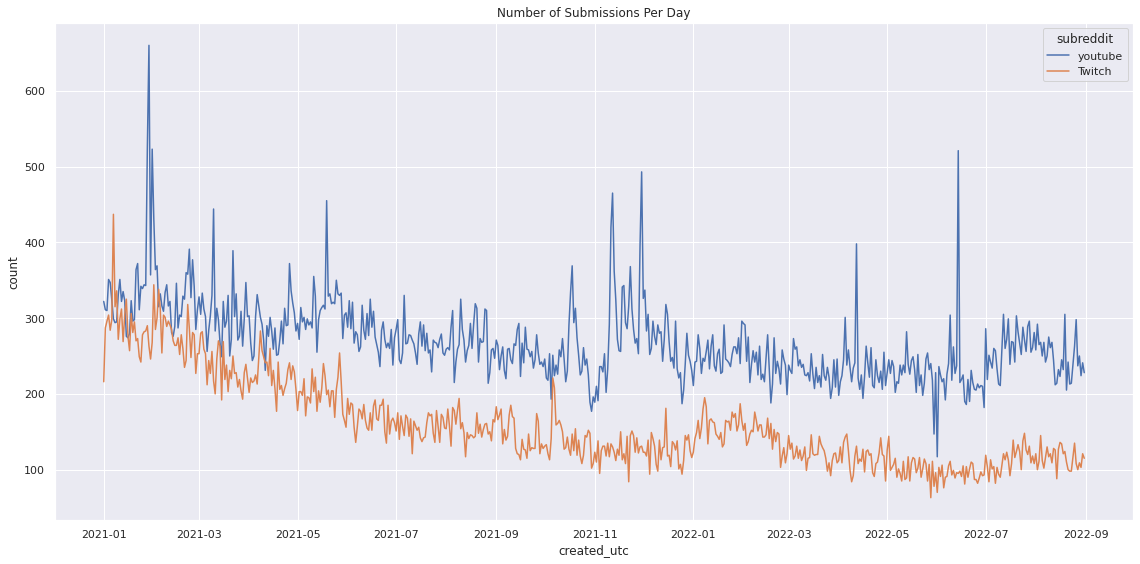

In [0]:
plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax = sns.lineplot(x='created_utc',
                  y='count',
                  hue='subreddit',
                  data=number_sub_byday).set(title='Number of Submissions Per Day')
plt.tight_layout()
plt.show()

After coverting the 'created_utc' column to datetime, we plotted the number of submissions for each subreddit per day. We can see that overall the daily activities for both subreddits are declining over the past two years. For most of times YouTube subreddit have more daily submissions then Twitch subreddit, while occasional spikes for YouTube are more significant, usually indicating a service interruption (which will be discussed later). The stock price time plot for the parent company of both platforms are included in the following chunks for reference.

## EDA3: Stock Price by Day(External Dataset)

In [0]:
stock_GOOG = pd.read_csv("/dbfs/FileStore/data/GOOG.csv")

In [0]:
stock_AMZN = pd.read_csv("/dbfs/FileStore/data/AMZN.csv")

In [0]:
stock = stock_GOOG[["Date", "Adj Close"]]
stock.columns = ["Date", "GOOG"]

In [0]:
stock = stock.merge(stock_AMZN[["Date", "Adj Close"]], on="Date")

In [0]:
stock.columns = ["Date", "GOOG", "AMZN"]
stock["Date"] = pd.to_datetime(stock["Date"])

In [0]:
stock.head()

,Date,GOOG,AMZN
0,2021-01-04,86.412003,159.331497
1,2021-01-05,87.045998,160.925507
2,2021-01-06,86.764503,156.919006
3,2021-01-07,89.362503,158.108002
4,2021-01-08,90.360497,159.134995


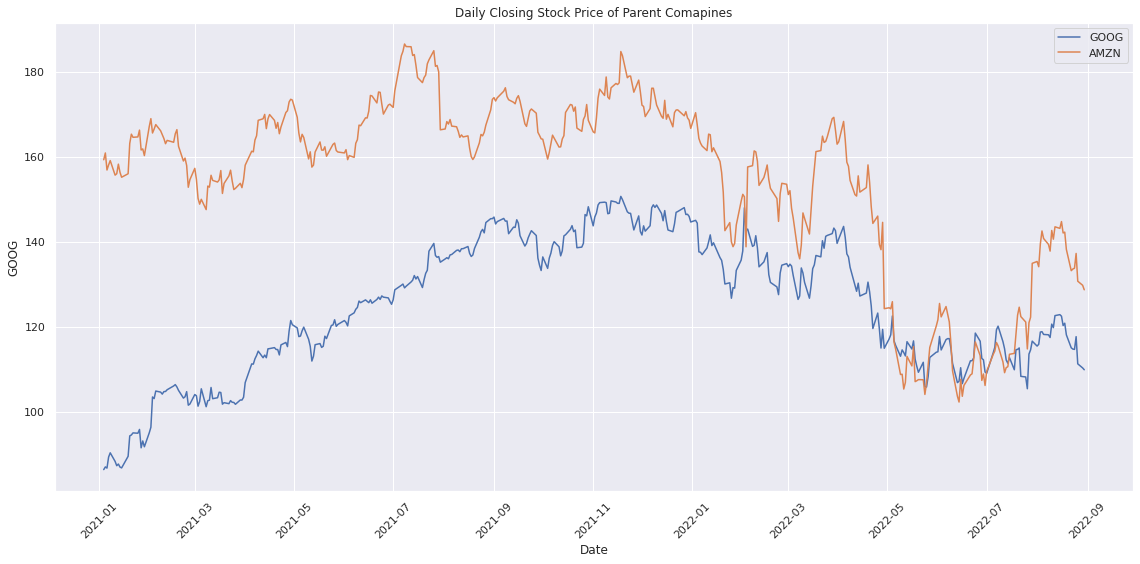

In [0]:
fig, axes = plt.subplots(figsize=(16,8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax1 = sns.lineplot(x = 'Date',
                   y = 'GOOG',
                   label = 'GOOG',
                   data = stock)
ax2 = sns.lineplot(x = 'Date',
                   y = 'AMZN',
                   label = 'AMZN',
                   data = stock).set(title='Daily Closing Stock Price of Parent Comapines')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## EDA4: Comments features for submission in two subreddit

The below table shows total number of comments for each subreddit. Even youtube has more submissions then Twitch, twitch has more comments, indicates that Twitch has higher user engagement.

In [0]:
submissions.groupBy('subreddit').sum("num_comments").show(truncate=False)

+---------+-----------------+
|subreddit|sum(num_comments)|
+---------+-----------------+
|youtube  |436090           |
|Twitch   |565109           |
+---------+-----------------+



In [0]:
from pyspark.sql.functions import sum,avg,max, min

In [0]:
submissions.groupBy('subreddit').agg(sum("num_comments").alias("sum_comments"), \
         avg("num_comments").alias("avg_comments"), \
         min("num_comments").alias("min_comments"), \
         max("num_comments").alias("max_comments")).show(truncate=False)

+---------+------------+------------------+------------+------------+
|subreddit|sum_comments|avg_comments      |min_comments|max_comments|
+---------+------------+------------------+------------+------------+
|youtube  |436090      |2.6658475156494523|0           |11033       |
|Twitch   |565109      |5.811307754799832 |0           |1333        |
+---------+------------+------------------+------------+------------+



Above table shown more detail for the number of comments for submissions. the maximum number of comments for youtube is 11,033, which is close to 10 times to Twitch (1333). The average of number of comments under each submission shows that Twitch has twice average of comments than youtube. This recomfirmed the statement we made earlier: Twitch subreddit has higher user engagement than youtube subreddit.

Variable `score` was calculated by number of upvoting - number of downvoting. A surprising phenomenon is that the minimum score are both zero for these two subreddits.

In [0]:
submissions.groupBy('subreddit').agg(sum("score").alias("sum_score"), \
         avg("score").alias("avg_score"), \
         min("score").alias("min_score"), \
         max("score").alias("max_score")).show(truncate=False) 

+---------+---------+------------------+---------+---------+
|subreddit|sum_score|avg_score         |min_score|max_score|
+---------+---------+------------------+---------+---------+
|youtube  |1342541  |8.207043476134585 |0        |22698    |
|Twitch   |1607683  |16.532634739775613|0        |9714     |
+---------+---------+------------------+---------+---------+



The summary table for score(upvote - downvote) shows the similar pattern as number of comments.

## EDA5: Most popular topics in two subreddits

### Distribution of comments

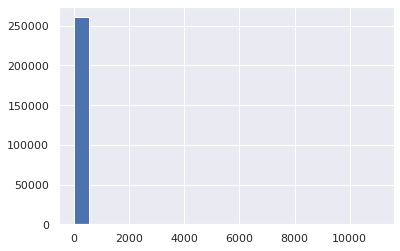

In [0]:
bins, counts = submissions.select('num_comments').rdd.flatMap(lambda x: x).histogram(100)
plt.figure(figsize=(8,6))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.show()

Above plot gives the distribution for number of comments. As it shows the data is significant skewed. This makes sense, since most of the submissions do not have comments. In a later step, we will make this variable a dummy variable, so that we can see the characteristics of a submission without a comment and a submission with a comment.

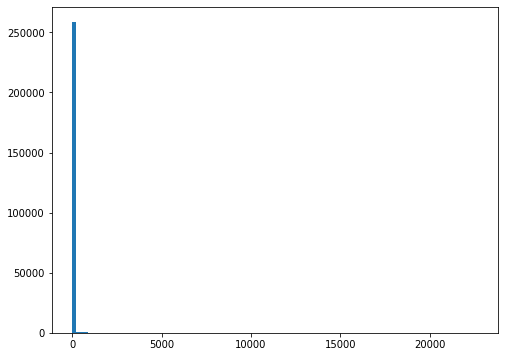

In [0]:
bins, counts = submissions.select('score').rdd.flatMap(lambda x: x).histogram(100)
plt.figure(figsize=(8,6))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.show()

Above plot gives the distribution for scores. As it shows the data is significant skewed. This makes sense, since most of the submissions has very few people to upvote or downvote. In a later step, we will make this variable into a dummy variable, so that we can see the characteristics of a submission with scores.

### Most comments topics

From the above analysis, we can see that for youtube and Twtich, the submissions with the most comments have 11033 and 1333 coments respectively. We are curious about what kind of topic makes such amount of comments.

The most comments topic for youtube is "Youtube.com is down right now. Please keep all discussion of the issue to this megathread." This topic has so many comments because the failure problem is concentrated in one submission.

The most comments topic for Twitch is "Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)". This means that Twitch's data leaking was a hot topic of discussion for two years.

In [0]:
submissions.select('subreddit', 'title', 'num_comments').where(submissions.subreddit=='youtube').sort(desc('num_comments')).show(10, truncate=False)

+---------+------------------------------------------------------------------------------------------+------------+
|subreddit|title                                                                                     |num_comments|
+---------+------------------------------------------------------------------------------------------+------------+
|youtube  |Youtube.com is down right now. Please keep all discussion of the issue to this megathread.|11033       |
|youtube  |#BringBackDislikes                                                                        |2557        |
|youtube  |#BringBackDislikes                                                                        |2554        |
|youtube  |#BringBackDislikes                                                                        |2554        |
|youtube  |#BringBackDislikes                                                                        |2554        |
|youtube  |#BringBackDislikes                                           

In [0]:
submissions.select('subreddit', 'title', 'num_comments').where(submissions.subreddit=='Twitch').sort(desc('num_comments')).show(10, truncate=False)

+---------+-------------------------------------------------------------------------------------------------------------------+------------+
|subreddit|title                                                                                                              |num_comments|
+---------+-------------------------------------------------------------------------------------------------------------------+------------+
|Twitch   |Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)|1333        |
|Twitch   |Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)|1333        |
|Twitch   |Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)|1333        |
|Twitch   |Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)|1333        |
|Twitch   |Ov

In [0]:
df_top5com = submissions.select('subreddit', 'title', 'num_comments').where((submissions.num_comments >= 2554) | ((submissions.num_comments == 1333) & (submissions.subreddit=='Twitch'))).sort(desc('subreddit'), desc('num_comments')).cache().toPandas()

In [0]:
display(df_top5com)

subreddit,title,num_comments
youtube,Youtube.com is down right now. Please keep all discussion of the issue to this megathread.,11033
youtube,#BringBackDislikes,2557
youtube,#BringBackDislikes,2554
youtube,#BringBackDislikes,2554
youtube,#BringBackDislikes,2554
Twitch,"Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)",1333
Twitch,"Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)",1333
Twitch,"Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)",1333
Twitch,"Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)",1333
Twitch,"Over 120GB of Twitch website data has been leaked online (source code, encrypted passwords, streamer payouts, etc.)",1333


### Highest score topics.

From the above analysis, we can see that for youtube and Twtich, the submissions with the highest score of 22698 and 9714 respectively. We are curious about what kind of topic has so many people upvote it.

The highest score topic for youtube is "Youtube.com is down right now. Please keep all discussion of the issue to this megathread." As users use this submission to discuss and solve problems, it causes most people to upvote this submission.

The highest score topic for Twitch is "Twitch Discoverability In A Nutshell".

In [0]:
from pyspark.sql.functions import sum, col, desc
submissions.select('subreddit', 'title', 'score').where(submissions.subreddit=='youtube').sort(desc('score')).show(10, truncate=False)

+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|subreddit|title                                                                                                                                                                                                        |score|
+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|youtube  |Youtube.com is down right now. Please keep all discussion of the issue to this megathread.                                                                                                                   |22698|
|youtube  |#BringBackDislikes                                                                           

In [0]:
submissions.select('subreddit', 'title', 'score').where(submissions.subreddit=='Twitch').sort(desc('score')).show(10, truncate=False)

+---------+----------------------------------------------------------------------------------------------------------------------------------------------+-----+
|subreddit|title                                                                                                                                         |score|
+---------+----------------------------------------------------------------------------------------------------------------------------------------------+-----+
|Twitch   |Twitch Discoverability In A Nutshell                                                                                                          |9714 |
|Twitch   |I'm a small streamer with 8 viewers on average, 100 followers and just blew up with one clip. I'm now the most watched twitch clip of all time|9519 |
|Twitch   |Say my name now                                                                                                                               |9452 |
|Twitch   |What A Great Idea      

In [0]:
df_top5 = submissions.select('subreddit', 'title', 'score').where(((submissions.score >= 14154) & (submissions.subreddit=='youtube')) | ((submissions.score >= 7719) & (submissions.subreddit=='Twitch'))).sort(desc('subreddit'), desc('score')).cache().toPandas()

In [0]:
display(df_top5)

subreddit,title,score
youtube,Youtube.com is down right now. Please keep all discussion of the issue to this megathread.,22698
youtube,#BringBackDislikes,14159
youtube,#BringBackDislikes,14156
youtube,#BringBackDislikes,14154
youtube,#BringBackDislikes,14154
Twitch,Twitch Discoverability In A Nutshell,9714
Twitch,"I'm a small streamer with 8 viewers on average, 100 followers and just blew up with one clip. I'm now the most watched twitch clip of all time",9519
Twitch,Say my name now,9452
Twitch,What A Great Idea,9281
Twitch,What's going on with half naked girls on Twitch front page ?,7719


## EDA6: Dummy Variable Distributions

### Dummy Score

In [0]:
#Count the score equal to "0"
submissions.filter(submissions.score == 0).count()

Out[19]: 54232

In [0]:
#Add new dummy variable "score_dummy":'0' represent score=0, '1' represent score!=0
from pyspark.sql.functions import when
submissions.withColumn('score_dummy', when(submissions.score ==0, 0).otherwise(1)).show(5)
submissions = submissions.withColumn('score_dummy', when(submissions.score ==0, 0).otherwise(1))

+------+---------+---------+--------------------+---------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+
|    id|author_id|subreddit|               title| selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|score_dummy|
+------+---------+---------+--------------------+---------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+
|ok0w0a|     null|  youtube|Green Screen Subs...|         |             0|           1|  false|   false|           false|  false|    null|   false|    1| 07/14/2021|          1|
|ok0w83|     null|  youtube|What The Hell Is ...|         |             0|           3|  false|   false|           false|  false|    null|   false|    0| 07/14/2021|          0|
|ok111s|     null|  youtube|Publishing beach ...|[removed]|             0|           1|   true|   false|      

In [0]:
number_dummy_score = submissions.groupby('subreddit', 'score_dummy').count().cache()
number_dummy_score.toPandas()

,subreddit,score_dummy,count
0,Twitch,0,31960
1,youtube,0,22272
2,youtube,1,141312
3,Twitch,1,65283


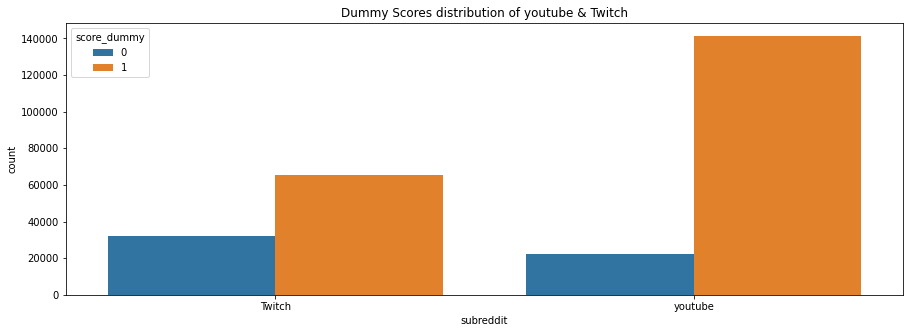

In [0]:
sns.barplot(data=number_dummy_score.toPandas(), x="subreddit", y="count",hue="score_dummy")
plt.title('Dummy Scores distribution of youtube & Twitch')
plt.show()

This bar plot illustrates 'number_dummy_score' with subreddit as x axis and the total count for the score dummy varibles as y axis. This plot is generated for discoving the quality of post for social media platforms of Twitch and Youtube. From the plot, it is clearly showed that the most of the posts are in line with majority opinions.

### Dummy Title

In [0]:
#Add new dummy variable "title_dummy":'0' represent the title is not a format of question =0, '1' represent the title format is a question

# just for test:
#submissions.filter(col("title").rlike("/?.*$")).show()

from pyspark.sql.functions import when
submissions.withColumn('title_dummy', when(col("title").rlike("\?"), 1).otherwise(0)).show(5)
submissions = submissions.withColumn('title_dummy', when(col("title").rlike("\?"), 1).otherwise(0))

+------+---------+---------+--------------------+---------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+
|    id|author_id|subreddit|               title| selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|score_dummy|title_dummy|
+------+---------+---------+--------------------+---------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+
|ok0w0a|     null|  youtube|Green Screen Subs...|         |             0|           1|  false|   false|           false|  false|    null|   false|    1| 07/14/2021|          1|          0|
|ok0w83|     null|  youtube|What The Hell Is ...|         |             0|           3|  false|   false|           false|  false|    null|   false|    0| 07/14/2021|          0|          1|
|ok111s|     null|  youtube|Publishing beach ...|[

In [0]:
number_title_dummy = submissions.groupby('subreddit', 'title_dummy').count().cache()
number_title_dummy.toPandas()

,subreddit,title_dummy,count
0,Twitch,0,66750
1,youtube,0,116812
2,youtube,1,46772
3,Twitch,1,30493


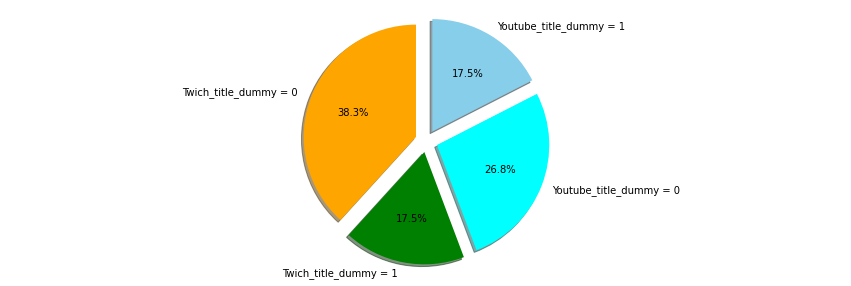

In [0]:
import matplotlib.pyplot as plt
data = {'Twich_title_dummy = 0 ':66750,
        'Twich_title_dummy = 1 ':30493,
        'Youtube_title_dummy = 0':46772,
        'Youtube_title_dummy = 1':30493,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

This pie chart pillustrates the distribution of 'number_title_dummy'. Four different colors stands for varibles of youtube and twitch with title dummy varibles of 0 or 1 where title_dummy = 1 means the title contains a question. This plot gives us insights that the percentage of post in both youtube and twitch are very similar(around 17%) when it is a question format.

## EDA7: Proportion of topics that are Not-Safe-For-Work

In [0]:
number_0ver18 = submissions.groupby('subreddit', 'over_18').count().cache()
number_0ver18

Out[40]: DataFrame[subreddit: string, over_18: boolean, count: bigint]

In [0]:
number_0ver18.toPandas()

,subreddit,over_18,count
0,Twitch,False,96305
1,youtube,False,159066
2,youtube,True,4518
3,Twitch,True,938


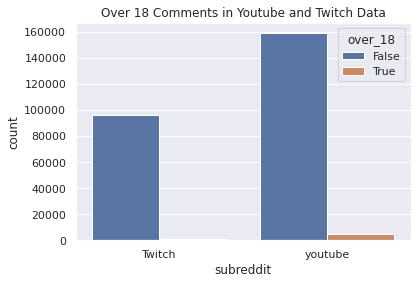

In [0]:
sns.barplot(data=number_0ver18.toPandas(), x="subreddit", y="count", hue="over_18")
plt.title('Over 18 Comments in Youtube and Twitch Data')
plt.show()

Within these two subreddit, Twitch redditer are less inclined to discuss contents that are Not-Safe-For-Work.

## EDA8: Relationship between length of title and mean score

In [0]:
submissions = submissions.withColumn('len_title', f.length('title'))

In [0]:
score_lentitle = submissions.groupBy('len_title', 'subreddit').agg({"score": "mean"}).toPandas()

In [0]:
score_lentitle

,len_title,subreddit,avg(score)
0,181,youtube,34.457627
1,69,youtube,6.619608
2,131,youtube,11.175758
3,284,youtube,1.760000
4,221,youtube,20.142857
...,...,...,...
608,312,youtube,1.000000
609,315,youtube,1.000000
610,307,youtube,1.000000
611,254,Twitch,0.600000


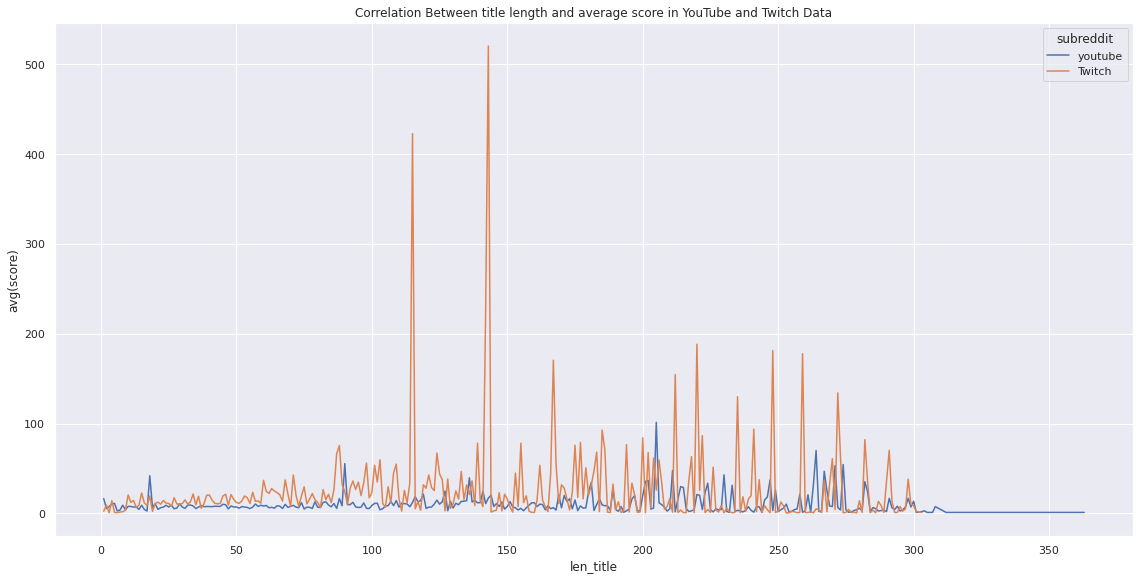

In [0]:
plt.figure(figsize=(16, 8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax = sns.lineplot(data=score_lentitle, x="len_title", y="avg(score)", hue="subreddit")
plt.tight_layout()
plt.title('Correlation Between title length and average score in YouTube and Twitch Data')
plt.show()

From the plot we can see YouTube subreddit have relatively more consistent score over lenth of post: Longer(or shorter) post does not impact on the average score as much as Twitch subreddit. While Twitch subredditers tends to engage more actively for submissions from 120 to 140 characters, which is a normal length limit for social network platforms.